# Run the GP optimizer in two dimensions

In [1]:
%run -i ../../../examples/prepare_gp_optimizer.py

dofs = [kbv.x_rot, kbv.offz] # two degrees of freedom of the vertical KB mirror

hard_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]])

for dof in dofs:
    dof.kind = "hinted"

In [2]:
gpo = Optimizer(
    init_scheme='quasi-random', 
    n_init=4, 
    run_engine=RE, 
    db=db, 
    detector=w9, 
    detector_type='image',
    dofs=dofs, 
    dof_bounds=hard_bounds, 
    fitness_model='max_sep_density',
    training_iter=100, 
    verbose=True,
)

learning with strategy "quasi-random" ...


   kbv_x_rot  kbv_offz    fitness
0  -0.045632  0.236417  11.292087
1   0.054368 -0.208028  11.412985
2  -0.095632  0.125305  10.514909
3   0.004368  0.458639        NaN


We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. But now that we have some points to work with, we can start to call some more sophisticated learning strategies. Let's try exploring the space ("explore"), and then try to aim for the best possible fitness ("exploit").

In [3]:
gpo.learn(n_iter=2, n_per_iter=2, strategy='explore', greedy=False, reuse_hypers=False)
gpo.learn(n_iter=2, n_per_iter=2, strategy='exploit', greedy=False, reuse_hypers=False)

learning with strategy "explore" ...


   kbv_x_rot  kbv_offz    fitness
4   0.009946  0.179957  12.168275
5  -0.022362 -0.324428  12.172489


   kbv_x_rot  kbv_offz    fitness
6   0.077032  0.133327   9.687557
7  -0.061594 -0.068229  11.104854
learning with strategy "exploit" ...


   kbv_x_rot  kbv_offz    fitness
8   0.000765 -0.342308  12.470885
9   0.000226 -0.114375  12.605609


    kbv_x_rot  kbv_offz    fitness
10   0.001670 -0.101627  12.454233
11   0.002174 -0.229237  12.555688


We can plot the "state" of the GPs, which shows their posteriors about the whole parameter space:

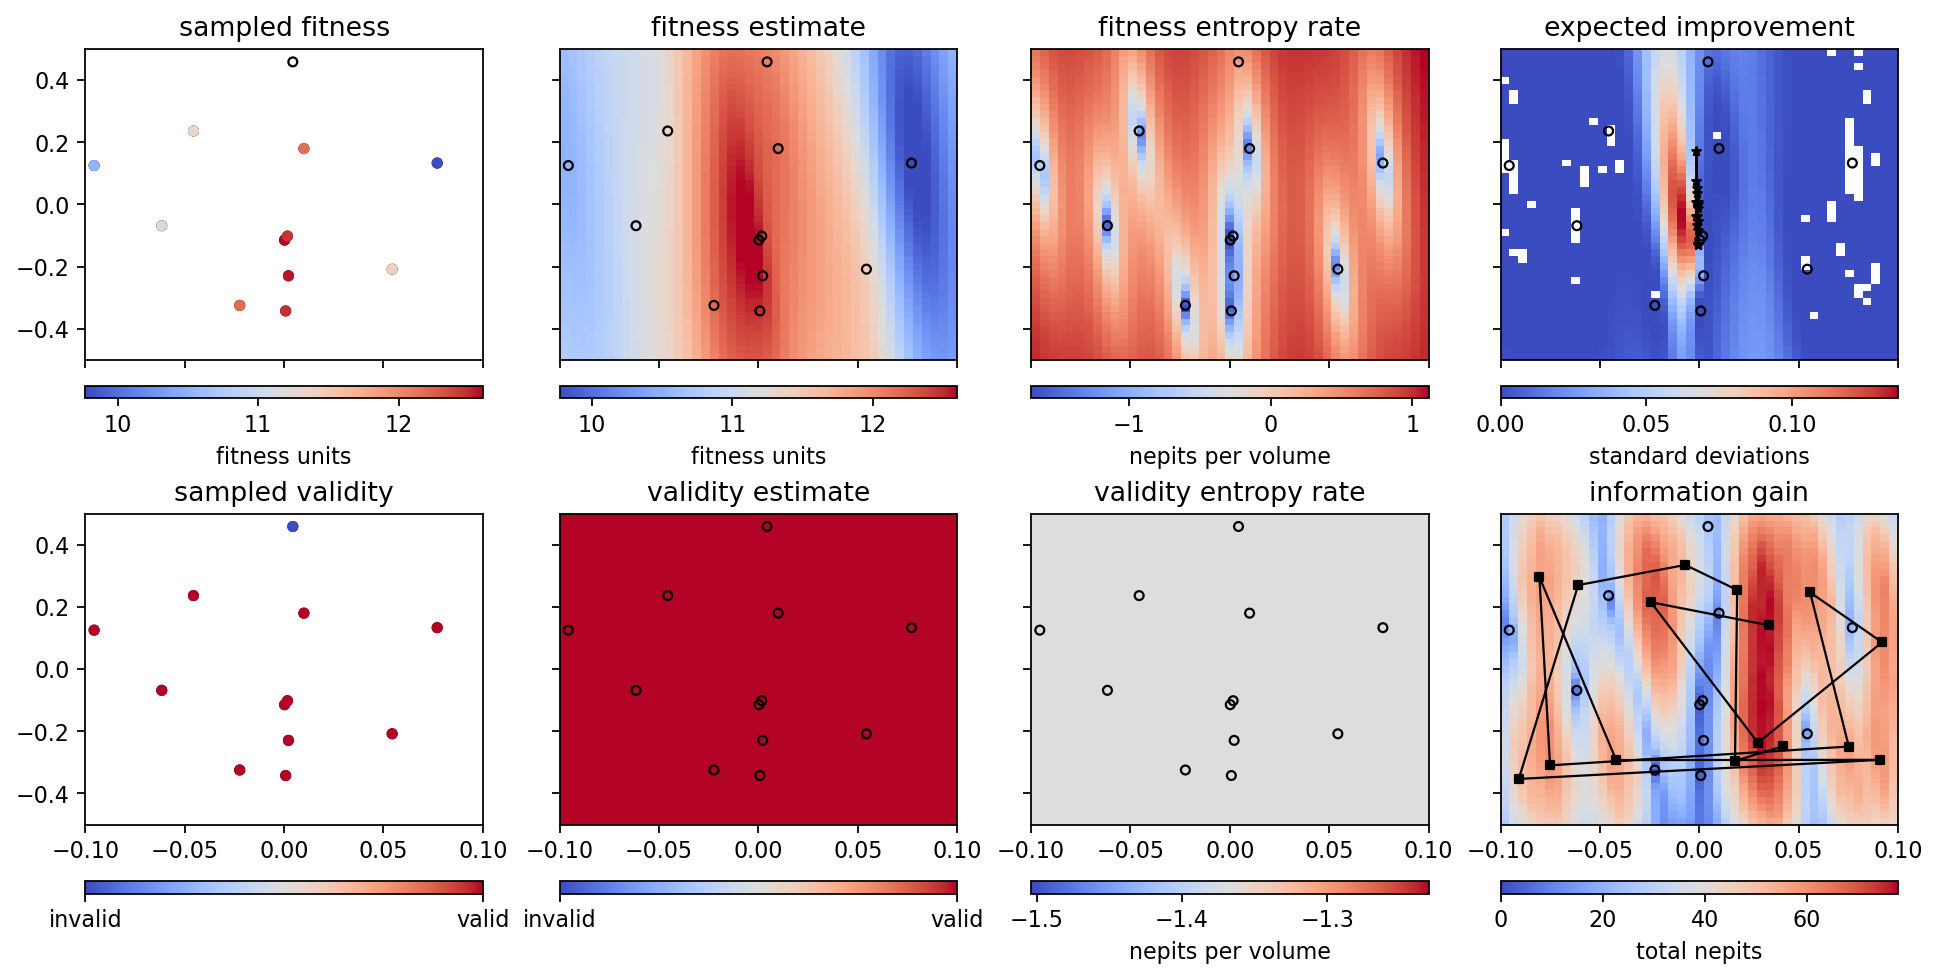

In [4]:
gpo.plot_state(gridded=True)

We can also plot the cumulative maximum fitness over time:

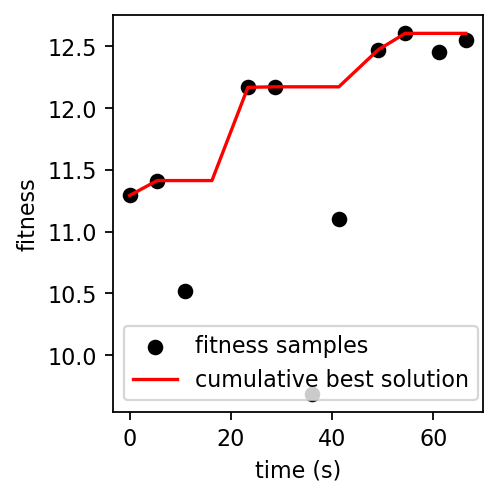

In [5]:
gpo.plot_fitness()